# Data Visualization and Processing 

By: Kris Ghimire, Thad Schwebke, Walter Lai, and Jamie Vo

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Contents

In [ ]:
# Insert the code from Kris to build the index with links to each section

# Business Understanding

Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

We have been hearing many news about homicide  lately in the mids of already existing Covid-19 pandemic. Violent crime and homicide have been rising saliently across the US. The number of homicide has almost increase by double digits in many bigger cities such has Chicago, New York, Philadelphia just to name few. To have better understanding about criminal and victim profile , to visualize some interesting relation and to make prediction on if the kind of homicide has been solved or unsolved we decided to pick homicide as a topic for our project.

Just to define simply, homicide is the killing of one person by another. Homicide might or might not be illegal. Legal homicide could be such as person killing intruders without committing crime or solders killing enemies in battle, while the illegal homicide is an intentional murder of one individual by another or if someone involves in the activities. Our data set has two types of crime: Murder or Manslaughter and Manslaughter by Negligence. Murder occurs when one human being unlawfully kills another human being. Murder are broken into degrees, First degree which is willful, deliberate and premeditated murder. Second-degree murder- which do not carry the death penalty. Manslaughter is the act of killing another human being in a way that is less accountable than murder. In other words manslaughter is not as sever crime as murder. Manslaughter is categorized into voluntary and involuntary manslaughter. Voluntary manslaughter is defined as killing of another human being under extreme provocation which typically does not require an intent to kill. For example an individual who kills another individual in self-defense may be charged with voluntary manslaughter if he was the original attacker in the situation.

While involuntary manslaughter is defined as death of another human being due to act of negligence or recklessness of the defendant.For example, a person who drives under the influence of alcohol may hit and kill a pedestrian, although killing him was not his intention.

United States does a poor job in tracking and accounting for its unsolved homicides. According to Scripps Howard News Service study of the FBI’s Uniform Crime Report, across U.S. nearly 185,000 cases of homicides and non-negligent manslaughter were unsolved from 1980 to 2008. The rate at which police clear homicides through arrest has declines year over year. About 4 of every 10 homicides go unsolved each year.As per FBI Uniform Crime Report, currently on average, 40 percent of homicides are unsolved. These rising number of unsolved homicides also known as cold case is a major problem to our society as well as law enforcement as its leaving a growing number of killers out on the streets, undermining the safety in urban neighborhoods and also crumbling the confidence in the criminal justice system.

No one knows all the names of the murder victims because no law enforcement agency in America is assigned to monitor failed homicide investigations by local police departments. Even the official national statistics on murder are actually estimates and projections based upon incomplete reports by police departments that voluntarily choose (or refuse) to participate in federal crime reporting programs.

Keeping all these in mind our primary key in this project is to help classify the cases solved or unsolved based on the data we have.

Our dataset come from the Murder Accountability Project which is a nonprofit group organized in 2015 to educate American on the important of accurately accounting for unsolved homicides. Their projects board of directory is composed of retired law enforcement investigators, investigative journalists, criminologists and other experts on various aspects of homicide.

--There are two predictions we're working towards--
1. Based on attributes of a case (i.e. Year, Month, City, State, Agency, Weapon, Victim attributes, Perpetrator attributes, and Relationship), we can predict if the case will be solved or not.
2. Based on attributes in a case (i.e. Year, Month, City, State, Weapon, and Victim attributes), we can profile the Perpetrator (Age, Race, Ethnicity, and Sex).

In [2]:
# all imported libraries used for analysis
import numpy as np
import pandas as pd 
import os 
import urllib
import copy
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px

# set color scheme and style for seaborn
sns.set(color_codes=True)
sns.set_style('whitegrid')

In [4]:
df=pd.read_csv('../Data/database.csv')
# display info which includes shape, columns, non-null count, and datatype
# print the number of records and columns
records = len(df)
attributes = df.columns

print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

# use df.info()

C:\Users\Walt\anaconda3\envs\ML7331\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Imports various libraries used in the analysis of the homicide data

# Data Meaning Type

Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

--Data Meaning Type Full Write-up--

--Insert a table with all the features--

--Jamie has a really nice table view based on an Excel file--

--Align data description and sttribute types information from Kris--


In [6]:
df_description = pd.read_excel('../Data/data_description.xlsx')
pd.set_option('display.max_colwidth', 0)
df_description

FileNotFoundError: [Errno 2] No such file or directory: '../Data/data_description.xlsx'

The [Homicide Report dataset](https://www.kaggle.com/murderaccountability/homicide-reports) from Kaggle is read into a dataframe

In [8]:
# data wrangling, clean-up, rename headers, drop columns, change data types, and transforms
# change crime solved values - Yes = 1 and No = 0 
df['Crime Solved']=df['Crime Solved'].replace(to_replace='No',value=0)
df['Crime Solved']=df['Crime Solved'].replace(to_replace='Yes',value=1)

# cleanse the Perpetrator Age
#print('Max age of Perpetrator before:', homicide_df.loc[homicide_df['Perpetrator Age'].apply(lambda x:isinstance(x,(int,float))),'Perpetrator Age'].max())
#print('Min age of Perpetrator before:', homicide_df.loc[homicide_df['Perpetrator Age'].apply(lambda x:isinstance(x,(int,float))),'Perpetrator Age'].min())


df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=" ",value=0)
df['Perpetrator Age'] = df['Perpetrator Age'].astype(int)
#homicide_df['Perpetrator Age']=pd.to_numeric(homicide_df['Perpetrator Age'])
index=df[df['Perpetrator Age'] > 98].index
df.drop(index, inplace=True)
df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=0,value=df['Perpetrator Age'].median())
print('Max age of Perpetrator after:', df['Perpetrator Age'].max())
print('Min age of Perpetrator after:', df['Perpetrator Age'].min())

# cleanse the Victim Age
print('Max age of Victim before:', df['Victim Age'].max())
print('Min age of Victim before:', df['Victim Age'].min())
df['Victim Age']=df['Victim Age'].replace(to_replace=998,value=df['Victim Age'].median())
print('Max age of Victim after:',df['Victim Age'].max())
print('Min age of Victim after:', df['Victim Age'].min())

# remove records where Relationship, Weapon, Victim & Perpetrator Sex, Race, 
# and Ethinicity are Unknown and Victim & Perpetrator Age is 0


# combine Victim and Perpetrator Race & Ethnicity into new features - Victim_Race_Ethnicity and Perpetrator_Race_Ethnicity


# create bins for Victim and Perpetrator Age in a new feature - Victim_Age_Group and Perpetrator_Age_Group




Max age of Perpetrator after: 98
Min age of Perpetrator after: 1
Max age of Victim before: 998
Min age of Victim before: 0
Max age of Victim after: 99
Min age of Victim after: 0


In [ ]:
df['Perpetrator_age_range'] = pd.cut(df['Perpetrator Age'],[0,20,30,45,1e6],3,
                                     
                                     
                                           labels=['Age(0-20)','Age(21-30)','Age(31-45)','Age 45+'])

The Perpetrator Age column contained ages of 0 and an empty string.  They were imputed with the median perpetrator age.
The data dictionary specified that for Victim Ages, 'A value of 999 represents victims whose age was not reported, usually
because the victim was unidentified and the age was unknown.'  The median victim ages were imputed for victim ages of 998. 

In [9]:

# group Relationship into logical bins - Relationship_Group
df.loc[(df['Relationship'] == 'Wife') | (df['Relationship'] == 'Ex-Wife') |
             (df['Relationship'] == 'Girlfriend') |
             (df['Relationship'] == 'Common-Law Wife'), 'Relationship_Group'] = 'Female Partner'

df.loc[(df['Relationship'] == 'Husband') | (df['Relationship'] == 'Ex-Husband') |
             (df['Relationship'] == 'Boyfriend') | 
             (df['Relationship'] == 'Common-Law Husband'), 'Relationship_Group'] = 'Male Partner'

df.loc[(df['Relationship'] == 'Boyfriend/Girlfriend') & (df['Victim Sex'] == 'Female'),
             'Relationship_Group'] = 'Female Partner'

df.loc[(df['Relationship'] == 'Boyfriend/Girlfriend') & ((df['Victim Sex'] == 'Male') |
            (df['Victim Sex'] == 'Unknown')) , 'Relationship_Group'] = 'Male Partner'

df.loc[(df['Relationship'] == 'Father') | (df['Relationship'] == 'In-Law') |
             (df['Relationship'] == 'Mother') | (df['Relationship'] == 'Stepfather') |
             (df['Relationship'] == 'Stepmother'), 'Relationship_Group'] = 'Parent'

df.loc[(df['Relationship'] == 'Daughter') | (df['Relationship'] == 'Son') |
             (df['Relationship'] == 'Stepdaughter') | 
             (df['Relationship'] == 'Stepson'), 'Relationship_Group'] = 'Children'

df.loc[(df['Relationship'] == 'Brother') | (df['Relationship'] == 'Sister'),
             'Relationship_Group'] = 'Sibling'

df.loc[(df['Relationship'] == 'Employee') | (df['Relationship'] == 'Employer') ,
             'Relationship_Group'] = 'Work'

df.loc[(df['Relationship'] == 'Family') , 'Relationship_Group'] = 'Other Family'

df.loc[(df['Relationship'] == 'Friend') , 'Relationship_Group'] = 'Friend'

df.loc[(df['Relationship'] == 'Neighbor') , 'Relationship_Group'] = 'Neighbor'

df.loc[(df['Relationship'] == 'Stranger') , 'Relationship_Group'] = 'Stranger'

df.loc[(df['Relationship'] == 'Acquaintance') , 'Relationship_Group'] = 'Acquaintance'

# combine City and State into a new feature - City_State


# combine Month and Year into a new feature - Month_Year


# drop Incident feature
if 'Incident' in df:
    del df['Incident']


The Relationship column contained 28 levels.  We wanted to decrease the number of levels to minimize the dimensions of our dataset to reduce model overfitting. 

Summarized what was completed in this step.

Summarized what was completed in this step.

Summarized what was completed in this step.

## Data Quality

 Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Be specific.


--Data Quality Full Write-up--

In [11]:
# check for null values using isnull().sum() and clean-up null values
# check for null values
df.isnull().sum()

Record ID                     0
Agency Code                   0
Agency Name                   0
Agency Type                   0
City                          0
State                         0
Year                          0
Month                         0
Crime Type                    0
Crime Solved                  0
Victim Sex                    0
Victim Age                    0
Victim Race                   0
Victim Ethnicity              0
Perpetrator Sex               0
Perpetrator Age               0
Perpetrator Race              0
Perpetrator Ethnicity         0
Relationship                  0
Weapon                        0
Victim Count                  0
Perpetrator Count             0
Record Source                 0
Relationship_Group       272950
dtype: int64

Summarized what was completed in this step.

In [12]:
# check for rows containing duplicate data and clean-up duplicate rows
df_duplicates = df.groupby(df.columns.tolist(),as_index=False).size()
#df_duplicates.loc[df_duplicates['size'] > 1]
df_duplicates[df_duplicates>1]

Series([], dtype: int64)

Summarized what was completed in this step.

Summarized what was completed in this step.

C:\Users\Walt\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\Walt\anaconda3\envs\ML7331\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


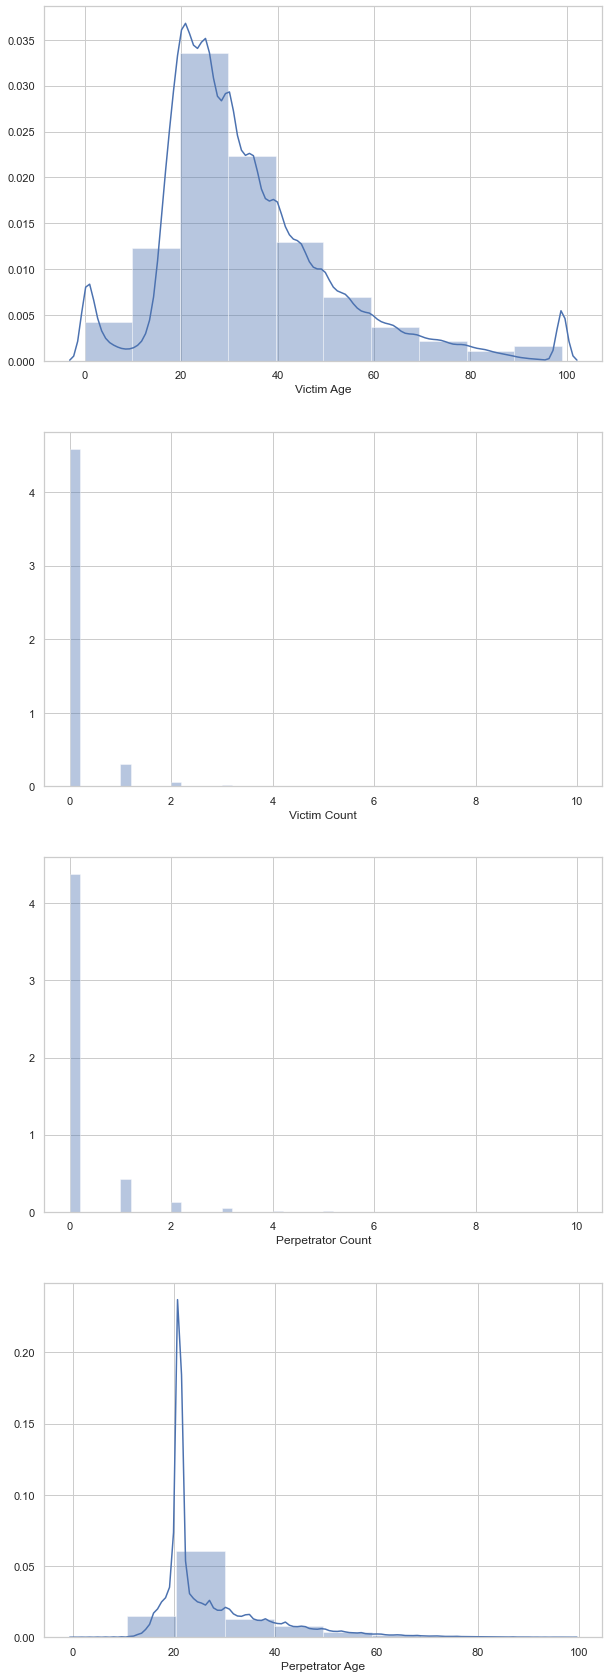

In [13]:
# histograms to look at the distributions
fig, axes = plt.subplots(nrows=4,ncols=1)
fig.set_size_inches(10, 30)
#sns.distplot(df['Incident'],ax=axes[0], bins=15)
sns.distplot(df['Victim Age'],ax=axes[0], bins=10)
sns.distplot(df['Victim Count'],ax=axes[1])
sns.distplot(df['Perpetrator Count'],ax=axes[2])
sns.distplot(df['Perpetrator Age'],ax=axes[3], bins=10)

Summarized what was completed in this step.

In [ ]:
# check for outliers using quantiles and IQR

Summarized what was completed in this step.

In [ ]:
# create a pairplot for continuous variables looking for outliers 

Summarized what was completed in this step.

In [ ]:
# Violin plots to compare distributions between groups

Summarized what was completed in this step.

Summarized what was completed in this step.

## Simple Statistics

Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.


--Simple Statistics Full Write-up--

In [15]:
# count, mean, standard deviation, minimum and maximum values and the quantities for continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,638364.0,319208.464470,184304.583460,1.0,159595.75,319198.5,478813.25,638454.0
Year,638364.0,1995.800069,9.927577,1980.0,1987.00,1995.0,2004.00,2014.0
Crime Solved,638364.0,0.702004,0.457378,0.0,0.00,1.0,1.00,1.0
Victim Age,638364.0,33.555949,17.778483,0.0,22.00,30.0,41.00,99.0
Perpetrator Age,638364.0,27.428027,11.349894,1.0,21.00,21.0,31.00,98.0
Victim Count,638364.0,0.123342,0.537763,0.0,0.00,0.0,0.00,10.0
Perpetrator Count,638364.0,0.185216,0.585498,0.0,0.00,0.0,0.00,10.0


Summarized what was completed in this step.

In [16]:
# total number of victim count
print('Total number victims=',df['Victim Count'].sum())

Total number victims= 78737


Summarized what was completed in this step.

In [17]:
# basic statistics for categorical features
df_categorical = df.select_dtypes(include='object')
df_categorical.describe()

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source,Relationship_Group
count,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,638364,365414
unique,12003,9216,7,1782,51,12,2,3,5,3,3,5,3,28,16,2,11
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Male,White,Unknown,Male,White,Unknown,Unknown,Handgun,FBI,Acquaintance
freq,38416,38416,492958,44510,99782,58689,629248,494055,317384,368223,399504,218228,446324,272950,317461,616581,126013


Summarized what was completed in this step.

In [18]:
# get all levels per categorical attribute
df_categorical_levels = pd.DataFrame()
df_categorical_levels['Attribute'] = df_categorical.columns
df_categorical_levels['Levels'] = ''
df_categorical_levels['Levels_Count'] = ''
df_categorical_levels['Unknown_Count'] = ''

# populate the dataframe with categorical levels and count of each category
for i, row in df_categorical_levels.iterrows():
    attribute = row['Attribute']
    df_categorical_levels.at[i,'Levels'] = df[attribute].unique()
    df_categorical_levels.at[i,'Levels_Count'] = len(df[attribute].unique())
    try:
        df_categorical_levels.at[i,'Unknown_Count'] = df.groupby(attribute).count().loc['Unknown'][0]
    except: 
        df_categorical_levels.at[i,'Unknown_Count'] = 0

In [19]:
# show the dataframe
df_categorical_levels.sort_values(by='Unknown_Count', ascending = False)

,Attribute,Levels,Levels_Count,Unknown_Count
12,Perpetrator Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,446324
9,Victim Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,368223
13,Relationship,"[Acquaintance, Unknown, Wife, Stranger, Girlfr...",28,272950
11,Perpetrator Race,"[Native American/Alaska Native, White, Unknown...",5,195988
10,Perpetrator Sex,"[Male, Unknown, Female]",3,190313
14,Weapon,"[Blunt Object, Strangulation, Unknown, Rifle, ...",16,33180
8,Victim Race,"[Native American/Alaska Native, White, Black, ...",5,6675
7,Victim Sex,"[Male, Female, Unknown]",3,984
1,Agency Name,"[Anchorage, Juneau, Nome, Bethel, North Slope ...",9216,47
15,Record Source,"[FBI, FOIA]",2,0


Summarized what was completed in this step.

In [ ]:
# include any pertinant crosstabs with percentages

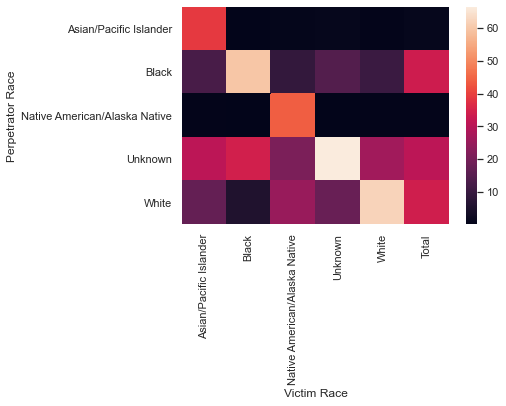

In [70]:
ct2 = pd.crosstab(df['Perpetrator Race'],
                 df['Victim Race'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 
sns.heatmap(ct2)

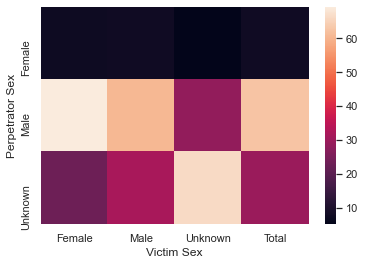

In [71]:
ct_sex = pd.crosstab(df['Perpetrator Sex'],
                 df['Victim Sex'],
                margins=True,
                margins_name='Total',
                normalize='columns')*100 # to percentage 
sns.heatmap(ct_sex)

Summarized what was completed in this step.

## Visualize Attributes

Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

Visualize attributes is just individual attributes

--Visualize Attributes Full Write-up--

Checklist of important attributes to visualize (use count of Record ID)
* Victim (Sex, Age, Race_Ethnicity) - bar plot
* Crime Type - pie chart
* Weapons - horizontal bar plot
* Perpetrator (Sex, Age, Race_Ethnicity) - bar plot
* State - map plot
* City_State - map plot
* Crime Solved - pie chart
* Month_Year - line plot

Perpetrator and Victim Count
- Are there more perpetrators than victims?

Weapon
- What weapons are most and least commonly used for murder over the time period?

Time series for homicede incidences 
- Has the homocide rates decrease from 1980-2014?
- What states have the highest and lowest number of incidences from 1980-2014?
- What states had the highest and lowest murder rate in 2014?

Age distribution
- What age group is the most predominent for perpetrators and victims?
- Has the age distribution change over the years?
- What ages encompass the most perpetrators? 
        
Race and sex 
- Perpetrator and victim sex distribution for each race?
- What is the age group distribution for each race?
- What perpetrator and victim race has the highest homicide incidences?
        
Relationship
- What relationship result in most murders from 1980-2014?
- What victim relationship result in most murders from 1980-2014?
- What relationship group has the most homicides?

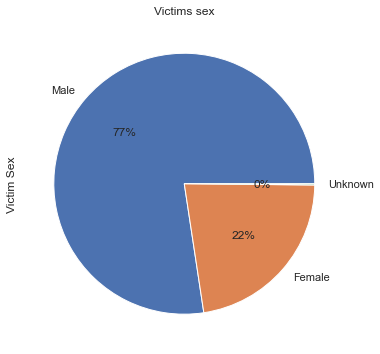

In [21]:
# Victim (Sex, Age, Race_Ethnicity) - bar plot
# Victims sex
v_sex = df['Victim Sex'].value_counts()
v_sex.plot.pie(autopct='%1.0f%%',figsize=(6, 6), title = 'Victims sex')

Summarized what was completed in this step.

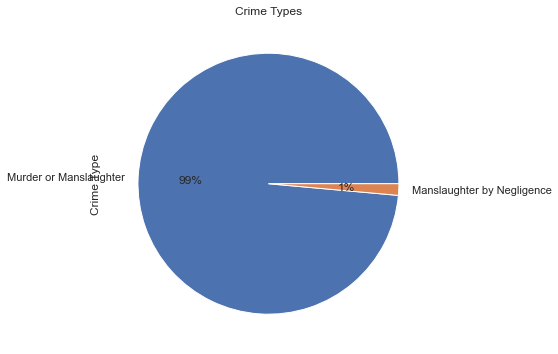

In [22]:
# Crime Type - pie chart
ct = df['Crime Type'].value_counts()
ct.plot.pie(autopct='%1.0f%%', figsize=(6, 6), title = 'Crime Types')

Summarized what was completed in this step.

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 <a list of 8 Text major ticklabel objects>)

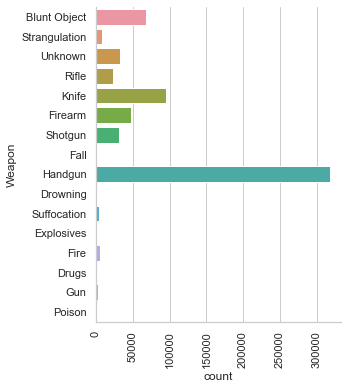

In [23]:
# Weapons - horizontal bar plot
weapon_plot=sns.catplot(kind='count',y='Weapon',data=df,orient='h')
plt.xticks(rotation=90)

Summarized what was completed in this step.

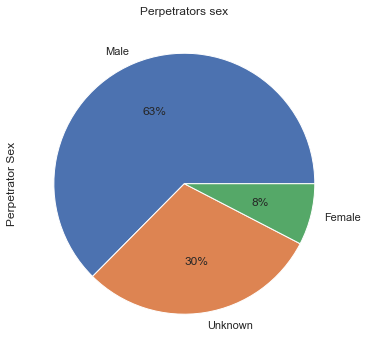

In [25]:
# Perpetrator (Sex, Age, Race_Ethnicity) - bar plot
# Perpetrator sex
p_sex = df['Perpetrator Sex'].value_counts()
p_sex.plot.pie(autopct='%1.0f%%', figsize=(6, 6), title = 'Perpetrators sex')

Summarized what was completed in this step.

In [ ]:
# City_State - map plot

Summarized what was completed in this step.

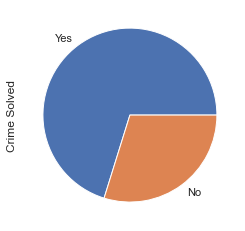

In [28]:
# Crime Solved - pie chart
solved_ct=df['Crime Solved'].value_counts()
solved_ct.index = ['Yes','No']
solved_ct.plot.pie()

Summarized what was completed in this step.

Summarized what was completed in this step.

In [ ]:
# Month_Year - line plot

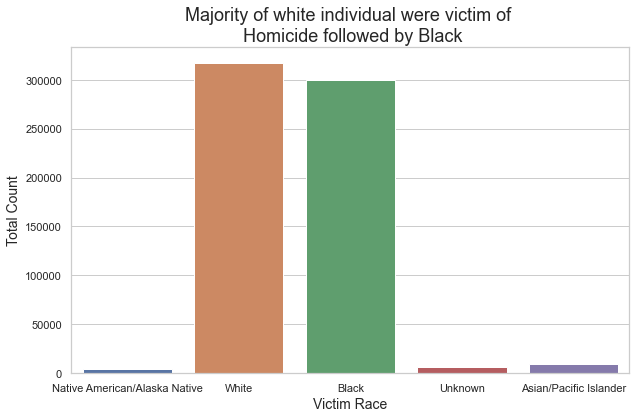

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,
              x='Victim Race',
              #y='Crime Type',
              #hue='Crime Type',
              #palette=['#432371',"#FAAE7B"] 
             )
plt.xlabel('Victim Race',size=14)
plt.ylabel('Total Count',size=14)
plt.title('Majority of white individual were victim of \n Homicide followed by Black',size=18)
plt.show()

Summarized what was completed in this step.

## Explore Joint Attributes

Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

Explore joint attributes is the comparing of multiple attributes (pairwise and correlation are good options)

--Explorer Joint Attributes Full Write-up--
Use scatter plots for 2 variable comparison
Use bubble plots for 3 variable comparison
Use line plots for time lines
Use geo map plots for locations

Correlation
- How is the homicide data correlated

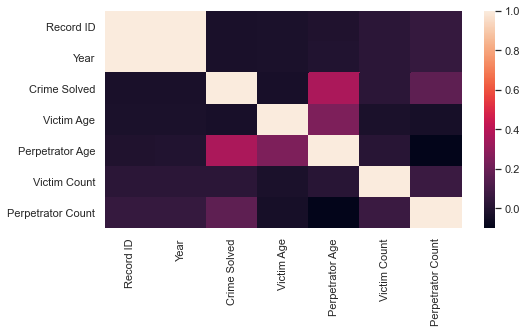

In [30]:
# Correclation plot
plt.figure(figsize=(8,4))
sns.heatmap(df.corr())

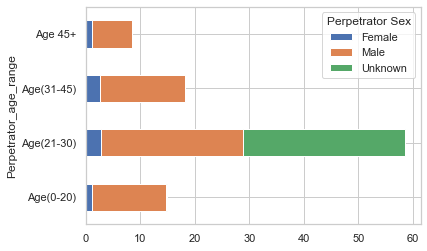

In [64]:

ct_Perpetrator_age_range = pd.crosstab(df.Perpetrator_age_range,
           df['Perpetrator Sex'],
           
           normalize=True).round(4)*100

ct_Perpetrator_age_range.plot(kind='barh',
                             stacked=True,
                             )

Summarized what was completed in this step.

Summarized what was completed in this step.

In [ ]:
# Create a plot to compare actual crime rate numbers to the homicide numbers to see if they follow the same pattern
# Need crime data from https://www.macrotrends.net/states/louisiana/murder-homicide-rate-statistics

Summarized what was completed in this step.

Summarized what was completed in this step.

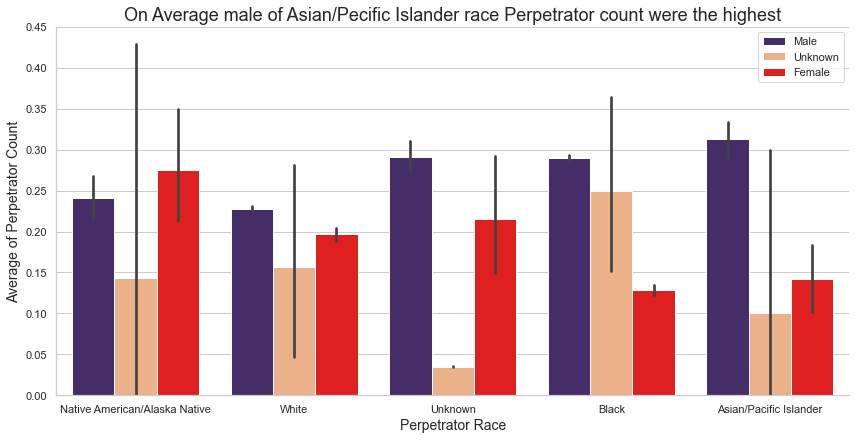

In [56]:

sns.catplot(x='Perpetrator Race',
           y='Perpetrator Count',
           kind='bar', 
           height=6,
            aspect=2,
            hue='Perpetrator Sex', 
            palette=['#432371',"#FAAE7B",'red'],
            legend=False,
           data=df)
plt.xlabel('Perpetrator Race',size=14)
plt.ylabel('Average of Perpetrator Count',size=14)
plt.title('On Average male of Asian/Pecific Islander race Perpetrator count were the highest',size=18)
plt.legend() 
plt.show()

In [32]:
# Victim (Sex, Age, Race_Ethnicity) vs Crime Solved
df_victime_gender = df.groupby(['Victim Age', 'Victim Sex', 'Year']).count().reset_index()
px.scatter(df_victime_gender, x="Victim Age", y="Record ID", animation_frame="Year", animation_group="Victim Age",
           size="Record ID", color="Victim Sex", hover_name="Record ID",
           log_x=False, size_max=20, range_x=[0,100], range_y=[0,1200])

In [53]:
states = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhodes Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_state = df.groupby('State').count().reset_index()

df_state['State_Abb'] = [states[full_state] for full_state in df_state['State']]
# State - map plot
# heat map of states 
fig = px.choropleth(locations=df_state['State_Abb'], 
                    locationmode="USA-states", 
                    color=df_state['Record ID'], 
                    color_continuous_scale='portland',
                    scope="usa")
fig.update_layout(
    title_text = 'Homicide Rates per State',
    geo_scope='usa', # limite map scope to USA
)
fig.show()

California, Texas, New York, and Florida are the leading states with homocide rates.

Summarized what was completed in this step.

Summarized what was completed in this step.

## Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Prediction can include 1 or more attributes (i.e. Perpetrator age and race to predict the profile of a murder based on other attributes

--Explore Attributes and Class Full Write-up--

Checklist of important attributes to visualize (use count of Record ID)
* Victim (Sex, Age, Race_Ethnicity) vs Crime Solved
* Weapons vs Crime Solved
* Perpetrator (Sex, Age, Race_Ethnicity) vs Crime Solved
* Perpetrator (Sex, Age, Race_Ethnicity) vs Crime Type
* State vs Crime Solved
* State vs Crime Type
* City_State vs Crime Type
* City_State vs Crime Solved
* Agency Type vs Crime Solved

Summarized what was completed in this step.

In [33]:
# Weapons vs Crime Solved
# Create Data structure like this Gun: 0.20 Yes, Knife 0.5 Yes
weapon_solved_series=df.groupby(['Weapon','Crime Solved'])['Record ID'].count()/df.groupby(['Weapon'])['Record ID'].count()
weapon_solved_df=weapon_solved_series.reset_index()
#sns.catplot(kind='bar',x='Weapon',y='Crime Solved',data=df)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

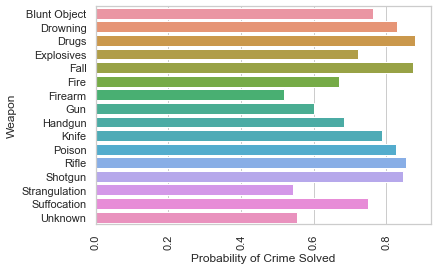

In [34]:
sns.barplot(y='Weapon',x='Record ID', data=weapon_solved_df[weapon_solved_df['Crime Solved']==1],orient='h').set_xlabel('Probability of Crime Solved')
plt.xticks(rotation=90)


Summarized what was completed in this step.

Summarized what was completed in this step.

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <a list of 9 Text major ticklabel objects>)

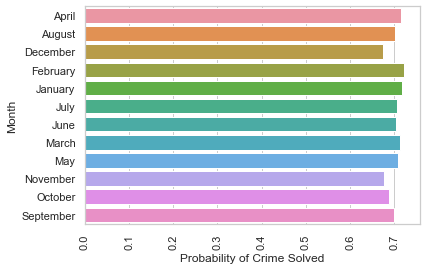

In [65]:
month_solved_series=df.groupby(['Month','Crime Solved'])['Record ID'].count()/df.groupby(['Month'])['Record ID'].count()
month_solved_df=month_solved_series.reset_index()
sns.barplot(y='Month',x='Record ID', data=month_solved_df[month_solved_df['Crime Solved']==1],orient='h').set_xlabel('Probability of Crime Solved')
plt.xticks(rotation=90)

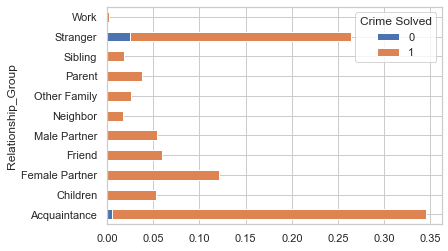

In [66]:
ct_relationship = pd.crosstab(df['Relationship_Group'],
           df['Crime Solved'],
           
           normalize=True)

ct_relationship.plot(kind='barh',
                             stacked=True,
                             )

Summarized what was completed in this step.

In [ ]:
# State vs Crime Type

Summarized what was completed in this step.

In [ ]:
# City_State vs Crime Type

Summarized what was completed in this step.

In [ ]:
# City_State vs Crime Solved

Summarized what was completed in this step.

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

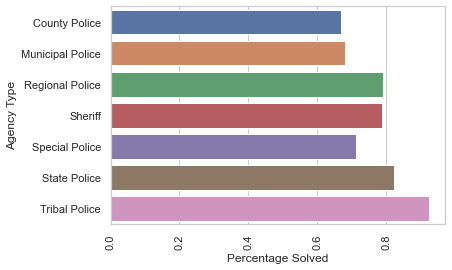

In [44]:
# Agency Type vs Crime Solved
agency_solved_df = df.groupby(['Agency Type','Crime Solved'])['Record ID'].count()/df.groupby(['Agency Type'])['Record ID'].count()
agency_solved_df=agency_solved_df.reset_index()
 
sns.barplot(y='Agency Type',x='Record ID', data=agency_solved_df[agency_solved_df['Crime Solved']==1],orient='h').set_xlabel('Percentage Solved')
plt.xticks(rotation=90)

Summarized what was completed in this step.

In [45]:
df_homicides_per_year = df.groupby('Year').count().reset_index()
df_homicides_per_year_solved = df.groupby(['Year', 'Crime Solved']).count().reset_index()
#df_homicides_per_year['Record ID']

In [46]:
# Create traces
solved_y = df_homicides_per_year_solved.loc[df_homicides_per_year_solved['Crime Solved'] == 1]
unsolved_y = df_homicides_per_year_solved.loc[df_homicides_per_year_solved['Crime Solved'] == 0]

df_homicides_solved = pd.DataFrame()
df_homicides_solved['Year'] = df_homicides_per_year['Year']
df_homicides_solved['Unsolved'] = unsolved_y['Record ID'].values
df_homicides_solved['Solved'] = solved_y['Record ID'].values
df_homicides_solved['Total Homicides'] = df_homicides_per_year['Record ID']
# new variable creations
df_homicides_solved['Unsolved_Solved_Diff'] = df_homicides_solved['Solved'] - df_homicides_solved['Unsolved']
df_homicides_solved['Diff_Percentage'] = round((df_homicides_solved['Unsolved_Solved_Diff']/df_homicides_solved['Total Homicides'])*100,2)

In [47]:
from plotly.subplots import make_subplots
fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_homicides_per_year['Year'], y=df_homicides_per_year['Record ID'],
                    mode='lines+markers',
                    name='Homicide Rates',
                        ),secondary_y=False)
#fig.add_trace(go.Scatter(x=solved_y['Year'], y=solved_y['Record ID'],
#                    mode='lines+markers',
 #                   name='Solved Homicides'))
#fig.add_trace(go.Scatter(x=unsolved_y['Year'], y=unsolved_y['Record ID'],
 #                   mode='lines+markers',
  #                  name='Unsolved Homicides'))


fig.add_trace(go.Scatter(x=df_homicides_solved['Year'], y=df_homicides_solved['Diff_Percentage'],
                        mode='lines+markers',
                        name='%Difference<br>Solved VS Unsolved',
                       ), secondary_y=True)

fig.update_layout(
    title={
        'text': "Homicides Per Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Year",
    yaxis_title=" Number of Homicides")
fig.update_yaxes(title_text="Percent Difference Solved Vs UnSolved", secondary_y=True)
fig.show()

Summarized what was completed in this step.

Summarized what was completed in this step.

Decision Tree
- Can we predict whether the crime will be solved or unsolved for victims?

## New Features

Are there other features that could be added to the data or created from existing features? Which ones?

New features - can we do something to clean up city, state, and agency? (qcut in pandas)

--New Features Full Write-up--

--New features were created in the Data Meaning Type section we ust need to do the write=up for them--
Victim_Race_Ethnicity
Perpetrator_Race_Ethnicity
Victim_Age_Group
Perpetrator_Age_Group
Relationship_Group
City_State
Month_Year

## Exceptional

Include PCA and fit a model for exceptional points

Initial view of the dataset shows that headers are descriptive enough and won't require any changes. However, we need to look at the equivalent of a N/A in the Perpetrator and Victim Age columns. The N/A equivalent is 0.

In [48]:
# Function to create dummy variables
def dummy_code(col, df): # input the column names and dataframe
    df_dummy = pd.DataFrame()
    for val in col:
        df_dummy_temp = pd.get_dummies(df[val], prefix=val)
        df_dummy = pd.concat([df_dummy, df_dummy_temp], axis=1, sort=False)
    return df_dummy

In [49]:
# select columns for cummy coding
cat_col = df_categorical.columns.values
categorical = np.delete(cat_col, [0,1])

In [50]:
# call function for dummy coding variables
df_dummy = dummy_code(categorical, df)

In [104]:
# export to csv
df_full = pd.concat([df_dummy, df[df.describe().columns]], axis=1, sort=False)
df_full = pd.concat([df_dummy, df[['Agency Name', 'Agency Code']]], axis=1, sort=False)
df_full.to_csv('../Data/Dummy_coded_database.csv')

In [ ]:
# scale the data
df_full = pd.read_csv('../Data/Dummy_coded_database.csv')
df_full = df_full.drop('Unnamed: 0', axis=1)

Summarized what was completed in this step.

In [ ]:
# Train/Test split due to the large data size and for data validation
# set seed
random.seed(1234)
df_pca = df_full.drop(['Agency Name', 'Agency Code'], axis=1)


In [ ]:
# split into train/test
y = df_pca['Crime Solved_Yes']
x = df_pca.drop(['Crime Solved_Yes', 'Crime Solved_No'], axis = 1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8)

Summarized what was completed in this step.

In [ ]:
# PCA
# Standardizing the features
x = StandardScaler().fit_transform(x_train)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=['PCA_'+ str(x) for x in range(10)])

In [ ]:
df_PCA = pd.concat([principalDf, y], axis=1)

In [ ]:
fig = px.scatter(principalComponents, x=df_PCA['PCA_0'], y=df_PCA['PCA_1'], color=df_PCA['Crime Solved_Yes'],
                width=600, height=300)
fig.update_layout(title='PCA 1 vs. PCA 2',
                  yaxis_zeroline=False, xaxis_zeroline=False)
fig.update_xaxes(title_text='PCA 1')
fig.update_yaxes(title_text='PCA 2')
fig.show()

Summarized what was completed in this step.

In [ ]:
# Linear Regresiion
# check for a balanced dataset
df_crime = df_full[['Crime Solved_Yes', 'Crime Solved_No']].groupby('Crime Solved_Yes').count().reset_index().rename(columns={'Crime Solved_No':'Count'})
df_crime['Solved'] = ['No', 'Yes']
df_crime = df_crime.drop('Crime Solved_Yes', axis=1)
total = df_crime['Count'].sum()
df_crime['Percentage'] = [x/total for x in df_crime['Count']]
df_crime

Summarized what was completed in this step.

# Archive

Delete before turning in

In [ ]:
profile = ProfileReport(homicide_df, title="Pandas Profiling Report")
profile.to_file("pandas_report.html")

In [ ]:
#https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/
#https://analyticsindiamag.com/beginners-guide-to-pyjanitor-a-python-tool-for-data-cleaning/
# for normalizing, scaling, and encoding categorical values

In [ ]:
# sample EDA
#https://github.com/Dongee-W/EDA-python-spark/blob/master/seaborn.ipynb
#https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/